# Errors

Joint errors

In [28]:
%load_ext autoreload
%autoreload 2
from load import load_3D
from liftpose.vision_3d import XY_coord_dict, Z_coord_dict
import yaml
import logging
from imp import reload
import torch
import numpy as np
import matplotlib.pyplot as plt
import os 
import glob
import seaborn as sns
reload(logging)
logger = logging.getLogger(__name__).setLevel(logging.INFO)

# decleare data parameters
par_train = {'data_dir'       : "/data/LiftPose3D_2602/fly_prism/data_oriented/training_data/", # change the path 
             'out_dir'        : './out',
             "train_subjects" : ["004"],
             'test_subjects'  : ["002"],
             'actions'        : ['PR']}

# merge with training parameters
par_data = yaml.full_load(open('param.yaml', "rb"))
par = {**par_data["data"], **par_train}
root_dir = './out'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from liftpose.postprocess import load_test_results
data = torch.load(par['out_dir'] + "/test_results.pth.tar")
stat_2d, stat_3d = (
    torch.load(par['out_dir'] + "/stat_2d.pth.tar"),
    torch.load(par['out_dir'] + "/stat_3d.pth.tar"),
)
test_3d_gt, test_3d_pred, good_keypts = load_test_results(data, stat_2d, stat_3d, prism=True)
all_err = np.sqrt(np.abs(test_3d_gt - test_3d_pred).mean(axis=-1)) * 2.5 / 400
ttl_err = pd.DataFrame(all_err.reshape(-1,5)).dropna()
ttl_err.columns.names = ['frame']
ttl_err = ttl_err.rename(columns={1:'coxa-femur',2:'femur-tibia',3:'tibia-tarsus',4:'tarsus-tip'})

(0.0, 0.03)

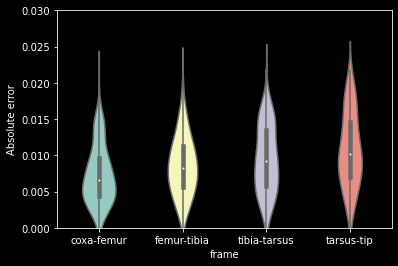

In [30]:
ttl_err1 = ttl_err.unstack().reset_index()
ttl_err1 = ttl_err1.rename(columns={0:'Absolute error'})
q = ttl_err1.quantile(q=0.99)
ttl_err1 = ttl_err1.loc[ttl_err1['Absolute error'] < q['Absolute error']]
sns.violinplot(x="frame", y='Absolute error', data=ttl_err1,bw=0.4, width=0.4, order=['coxa-femur', 'femur-tibia', 'tibia-tarsus', 'tarsus-tip'])
plt.ylim([0,0.03])